# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [1]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [7]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([1,1]).reshape(-1,1)

array([[101],
       [ 12],
       [  3]])

In [8]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([-1,0]).reshape(-1,1)

array([[-1],
       [-2],
       [-3]])

In [9]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0,2]).reshape(-1,1)

array([[200],
       [ 20],
       [  0]])

In [10]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0,0]).reshape(-1,1)

array([[0],
       [0],
       [0]])

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [13]:
# in the column space of B: a, c, e
# not in the column space: b (no weighting of 0 and 0 makes 1)
#                          d (if you multiple 2 and 3 by the same const, the sign will be the same)
c = np.array([-1,1]).reshape(-1,1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [14]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
])
y = np.array([7,5,5]).reshape(-1,1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [17]:
np.array([[ 4,  4,  1]]) @ c

array([[5.]])

In [18]:
np.array([[ 5,  5,  1]]) @ c

array([[5.75]])

In [19]:
X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [5,5,1],
])
y = np.array([7,5,5,5.75]).reshape(-1,1) # mathematically solveable, but numpy can't

c = np.linalg.solve(X, y)

LinAlgError: Last 2 dimensions of the array must be square

In [20]:
X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [5,5,1],
    [5,5,1],
])
y = np.array([7,5,5,5.75,6]).reshape(-1,1) # mathematically unsolveable

c = np.linalg.solve(X, y)

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [21]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1],
       [ 5,  5,  1]])

In [22]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75],
       [6.  ]])

In [26]:
c = np.linalg.solve(X.T@X, X.T@y)
c

array([[0.53030303],
       [0.28409091],
       [1.74242424]])

In [25]:
(X.T@X).shape # always be square

(3, 3)

# Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

## Fruit Sales Example

In [27]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [28]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [29]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [30]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [31]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

## Scatter Example

In [32]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,3.504551,6.886462
1,6.667655,11.858763
2,5.845882,12.510634
3,4.930835,9.276665
4,10.950303,20.892796
5,7.280914,14.339960
6,4.126693,7.543680
7,5.732401,11.169077
8,3.807144,7.524616
9,4.939171,8.241445


<AxesSubplot:xlabel='x', ylabel='y'>

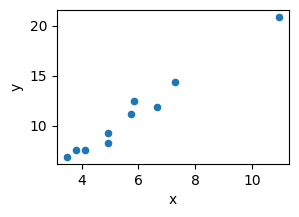

In [34]:
df.plot.scatter(x="x", y="y", figsize=(3,2))

In [35]:
X = df[["x"]].values
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.03258419, 0.06199371, 0.05435313, 0.04584532, 0.10181239,
        0.06769559, 0.03836866, 0.05329801, 0.03539759, 0.04592282],
       [0.06199371, 0.11794738, 0.10341065, 0.08722394, 0.19370523,
        0.12879561, 0.07299907, 0.10140322, 0.06734641, 0.0873714 ],
       [0.05435313, 0.10341065, 0.09066553, 0.07647379, 0.16983151,
        0.11292186, 0.06400211, 0.08890551, 0.05904612, 0.07660308],
       [0.04584532, 0.08722394, 0.07647379, 0.06450347, 0.14324805,
        0.09524637, 0.05398396, 0.07498927, 0.04980372, 0.06461252],
       [0.10181239, 0.19370523, 0.16983151, 0.14324805, 0.31812248,
        0.21152129, 0.11988652, 0.16653471, 0.11060314, 0.14349023],
       [0.06769559, 0.12879561, 0.11292186, 0.09524637, 0.21152129,
        0.14064161, 0.07971317, 0.11072979, 0.07354061, 0.0954074 ],
       [0.03836866, 0.07299907, 0.06400211, 0.05398396, 0.11988652,
        0.07971317, 0.04518001, 0.06275969, 0.04168151, 0.05407522],
       [0.05329801, 0.10140322, 0.0889055

In [37]:
df["p"] = P @ df[["y"]]
df

,x,y,p
0,3.504551,6.886462,6.692294
1,6.667655,11.858763,12.732560
2,5.845882,12.510634,11.163302
3,4.930835,9.276665,9.415927
4,10.950303,20.892796,20.910708
5,7.280914,14.339960,13.903639
6,4.126693,7.543680,7.880336
7,5.732401,11.169077,10.946597
8,3.807144,7.524616,7.270125
9,4.939171,8.241445,9.431846


<AxesSubplot:xlabel='x', ylabel='p'>

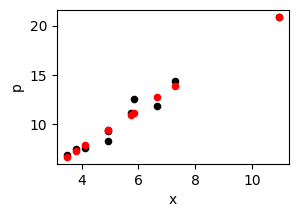

In [40]:
ax = df.plot.scatter(x="x", y="y", figsize=(3,2), color="k")
df.plot.scatter(x="x", y="p", figsize=(3,2), color="r", ax=ax)

# Euclidean Distance Between Columns

In [41]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [46]:
# the distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [48]:
# this is the smallest distance between y and a p possible, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

2.1145383191209377